In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math
import pickle
from scipy import stats

In [3]:
edge_iccs = pd.read_csv('../data/edge_iccs.txt', header=None)
BBS75_results = pickle.load(open('../saved_models/BBS75_results.pickle', 'rb'))
BBSCV_results = pickle.load(open('../saved_models/BBSCV_results.pickle', 'rb'))
Lasso_results = pickle.load(open('../saved_models/Lasso_results.pickle', 'rb'))
Ridge_results = pickle.load(open('../saved_models/Ridge_results.pickle', 'rb'))
CPMPos_results = pickle.load(open('../saved_models/CPMPos_results.pickle', 'rb'))
CPMNeg_results = pickle.load(open('../saved_models/CPMNeg_results.pickle', 'rb'))
Enet_results = pickle.load(open('../saved_models/ENet_results.pickle', 'rb'))
SVRLin_results = pickle.load(open('../saved_models/SVRLin_results.pickle', 'rb'))
SVRNonLin_results = pickle.load(open('../saved_models/SVRNonLin_results.pickle', 'rb'))
RF_results = pickle.load(open('../saved_models/RF_results.pickle', 'rb'))

In [4]:
all_results = [BBS75_results, BBSCV_results, Lasso_results, Ridge_results, CPMPos_results, CPMNeg_results, Enet_results, SVRLin_results, SVRNonLin_results, RF_results]
results_names = ['BBS-\n75', 'BBS-\nCV', 'Lasso', 'Ridge', 'CPM+', 'CPM-', 'ENet', 'SVR-\nLin', 'SVR-\nNonLin', ' Rand\n Forest']
model_colors = ['C1', 'C0', 'C5', 'C4', 'C2', 'C3', 'C6', 'C7', 'C8', 'C9']

In [6]:
phen_noncog = ['ASR_Extn_T', 'ASR_Intn_T', 'ASR_Attn_T', 'NEOFAC_O', 'NEOFAC_C', 'NEOFAC_E', 'NEOFAC_A', 
                     'NEOFAC_N', 'DDisc_AUC_40K', 'MMSE_Score', 'PSQI_Score', 'Endurance_Unadj', 'GaitSpeed_Comp',
                     'Dexterity_Unadj', 'Strength_Unadj', 'Odor_Unadj', 'PainInterf_Tscore', 'Taste_Unadj', 'Mars_Final', 
                     'Emotion_Task_Face_Acc', 'Language_Task_Story_Avg_Difficulty_Level', 'Social_Task_Perc_Random', 
                     'Social_Task_Perc_TOM', 'ER40_CR', 'ER40ANG', 'ER40FEAR', 'ER40NOE', 'ER40SAD', 'AngAffect_Unadj', 
                     'AngHostil_Unadj', 'AngAggr_Unadj', 'FearAffect_Unadj', 'FearSomat_Unadj', 'Sadness_Unadj', 'LifeSatisf_Unadj',
                     'MeanPurp_Unadj', 'PosAffect_Unadj', 'Friendship_Unadj', 'Loneliness_Unadj', 'PercHostil_Unadj', 'PercReject_Unadj',
                     'EmotSupp_Unadj', 'InstruSupp_Unadj', 'PercStress_Unadj', 'SelfEff_Unadj']

phen_cog = ['PMAT24_A_CR', 'ProcSpeed_Unadj', 'PicSeq_Unadj', 'CardSort_Unadj', 'Flanker_Unadj', 'ListSort_Unadj', 'ReadEng_Unadj',
                  'PicVocab_Unadj', 'SCPT_SEN', 'SCPT_SPEC', 'IWRD_TOT', 'VSPLOT_TC', 'Language_Task_Math_Avg_Difficulty_Level', 'WM_Task_Acc']

all_phen = list(np.concatenate((phen_cog, phen_noncog)))
all_phen.append('GenExec')
all_phen.append('ProcSpeed')

In [7]:
model_icc_acc_dict = dict()
for name in results_names:
    model_icc_acc_dict[name] = dict()
    model_icc_acc_dict[name]['mean_phen_icc'] = []
    model_icc_acc_dict[name]['mean_phen_acc'] = []

for model_result, model_name in zip(all_results, results_names):
    for phen in all_phen:
        folds_scores, sess1_folds_preds, sess2_folds_preds, models = model_result[phen]
        model_icc_acc_dict[model_name]['mean_phen_icc'].append(np.mean([x[0] for x in [x for y in folds_scores for x in y]]))
        model_icc_acc_dict[model_name]['mean_phen_acc'].append((np.nanmean([x[2] for x in [x for y in folds_scores for x in y]]) + np.nanmean([x[3] for x in [x for y in folds_scores for x in y]]))/2)

In [8]:
colors = ['C1', 'C0', 'C2', 'C3', 'C4', 'C5', 'C7', 'C8', 'C6', 'C9']
names = ['BBS-\n75', 'BBS-\nCV', 'CPM+', 'CPM-', 'Ridge', 'Lasso', 'SVR-\nLin', 'SVR-\nNonLin', 'ENet', ' Rand\n Forest']

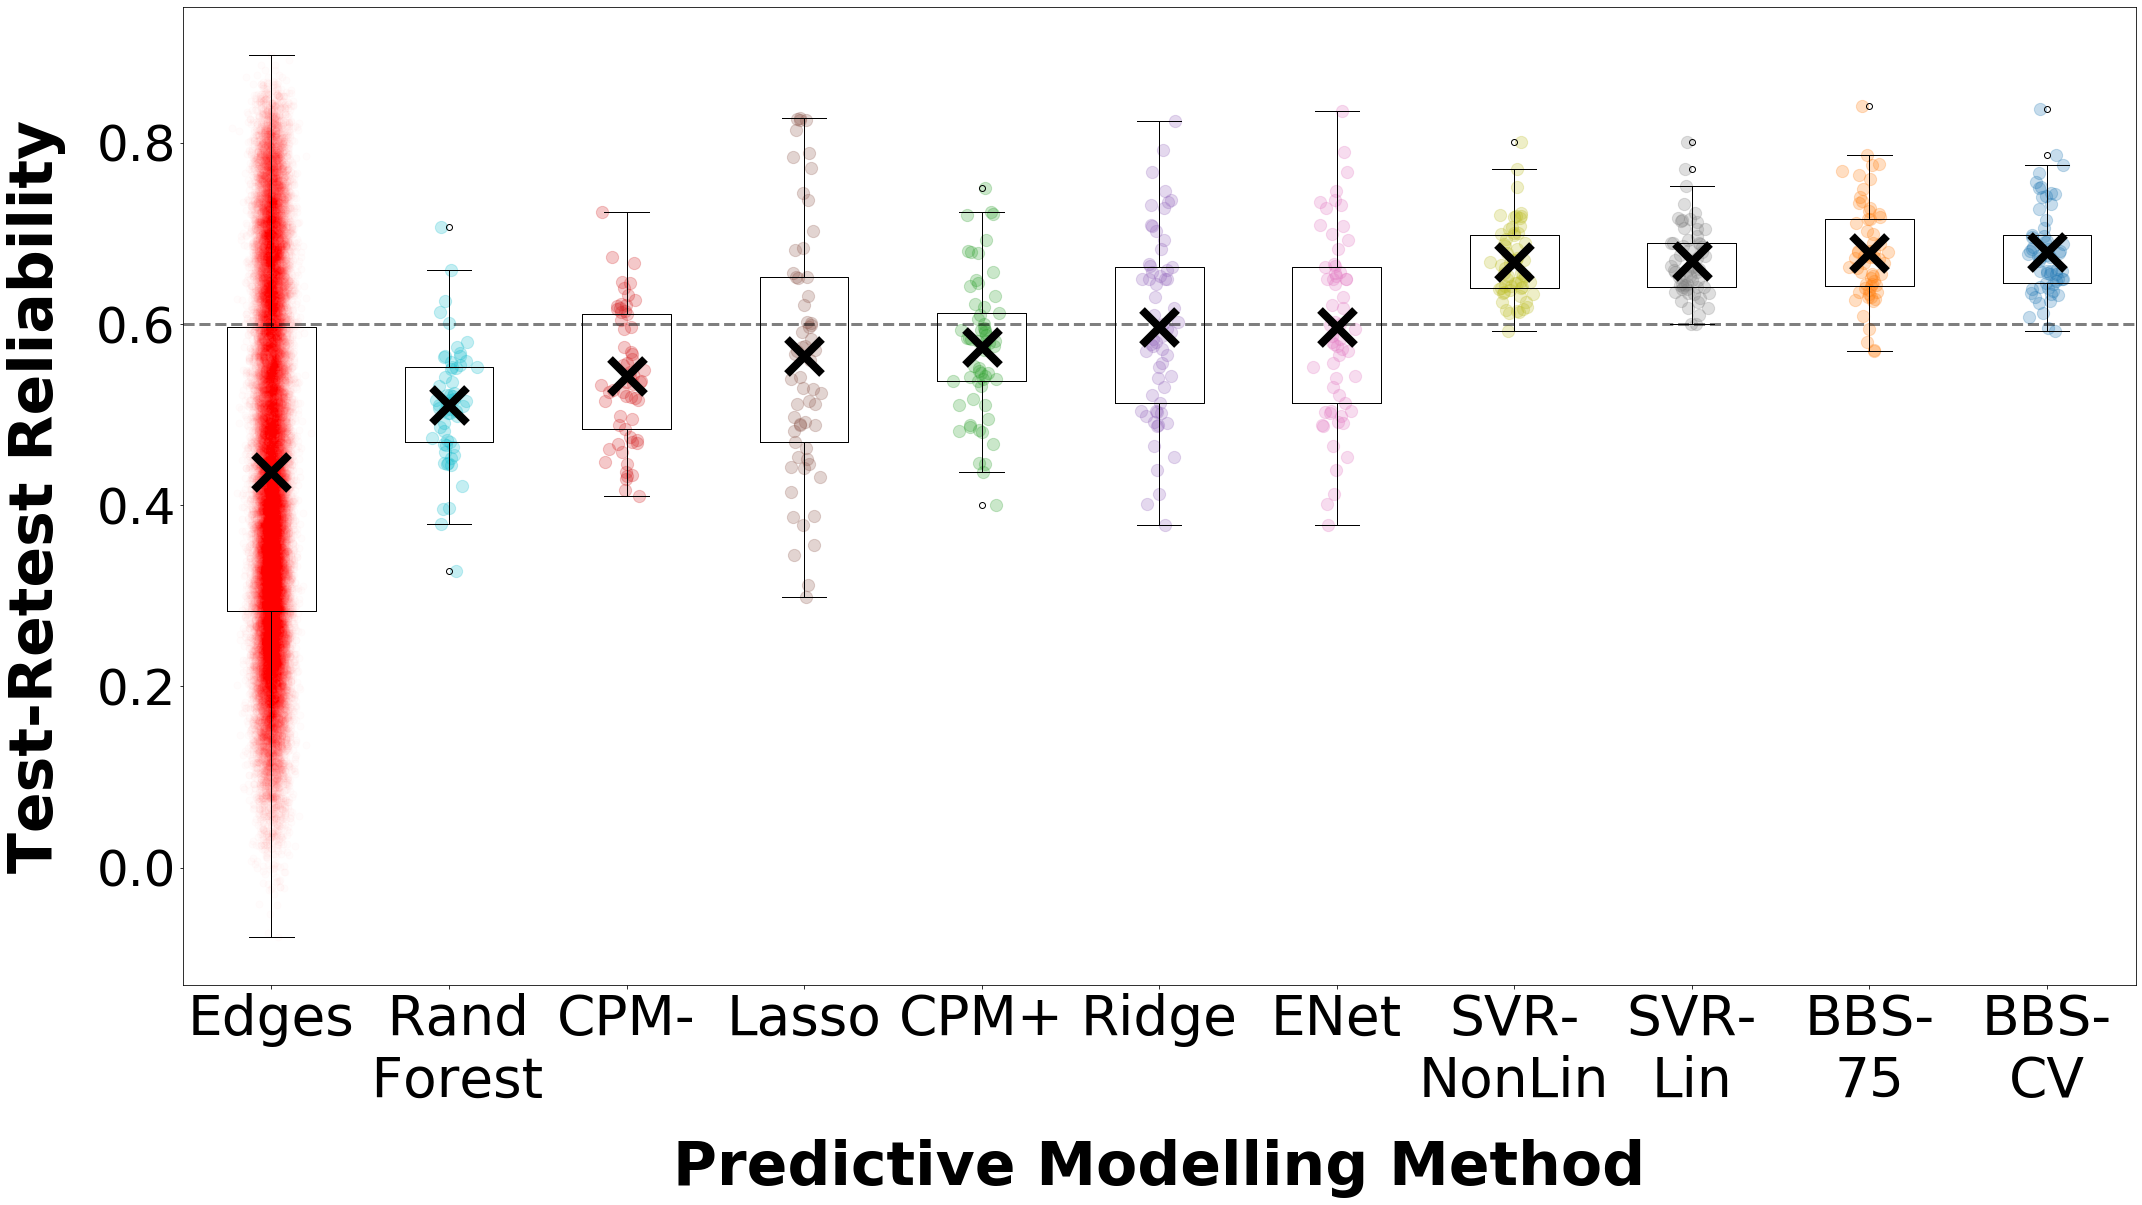

In [9]:
fig, ax = plt.subplots(figsize=(35, 18))

ICC_vals = [model_icc_acc_dict[model_name]['mean_phen_icc'] for model_name in results_names]
colors = model_colors
names = results_names

vals_names = zip(zip(ICC_vals, names), colors)
vals_names = sorted(vals_names, key=lambda x: np.mean(x[0][0]))
ICC_vals = [x[0][0] for x in vals_names]
names = [x[0][1] for x in vals_names]
colors = [x[1] for x in vals_names]

ICC_vals.insert(0, edge_iccs.values.flatten())
names.insert(0, 'Edges')
colors.insert(0, 'r')

medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=0, color='k')
plt.boxplot(ICC_vals,
            positions = range(len(ICC_vals)),
            labels=names,
            showmeans=True, meanline=True, meanprops=meanlineprops, medianprops=medianprops)
plt.plot(range(len(ICC_vals)), [np.mean(x) for x in ICC_vals], 'rp', marker='x', c='k', markersize=35, markeredgewidth=8)
np.random.seed(42)
for i in range(len(ICC_vals)):
    vals = ICC_vals[i]
    alpha = 0.01 if i == 0 else 0.25
    s = 50 if i==0 else 150
    plt.scatter(np.array([i for _ in vals]) + np.random.normal(0, 0.05, size=len(vals)), 
                vals, c=colors[i], alpha=alpha, s=s)

plt.ylabel('Test-Retest Reliability', fontsize=60, weight='bold', labelpad=30)
plt.xlabel('Predictive Modelling Method', fontsize=60, weight='bold', labelpad=30)

plt.axhline(y=0.6, color='k', linestyle='--', linewidth=3, alpha=0.5)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(55) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(50) 

plt.show()

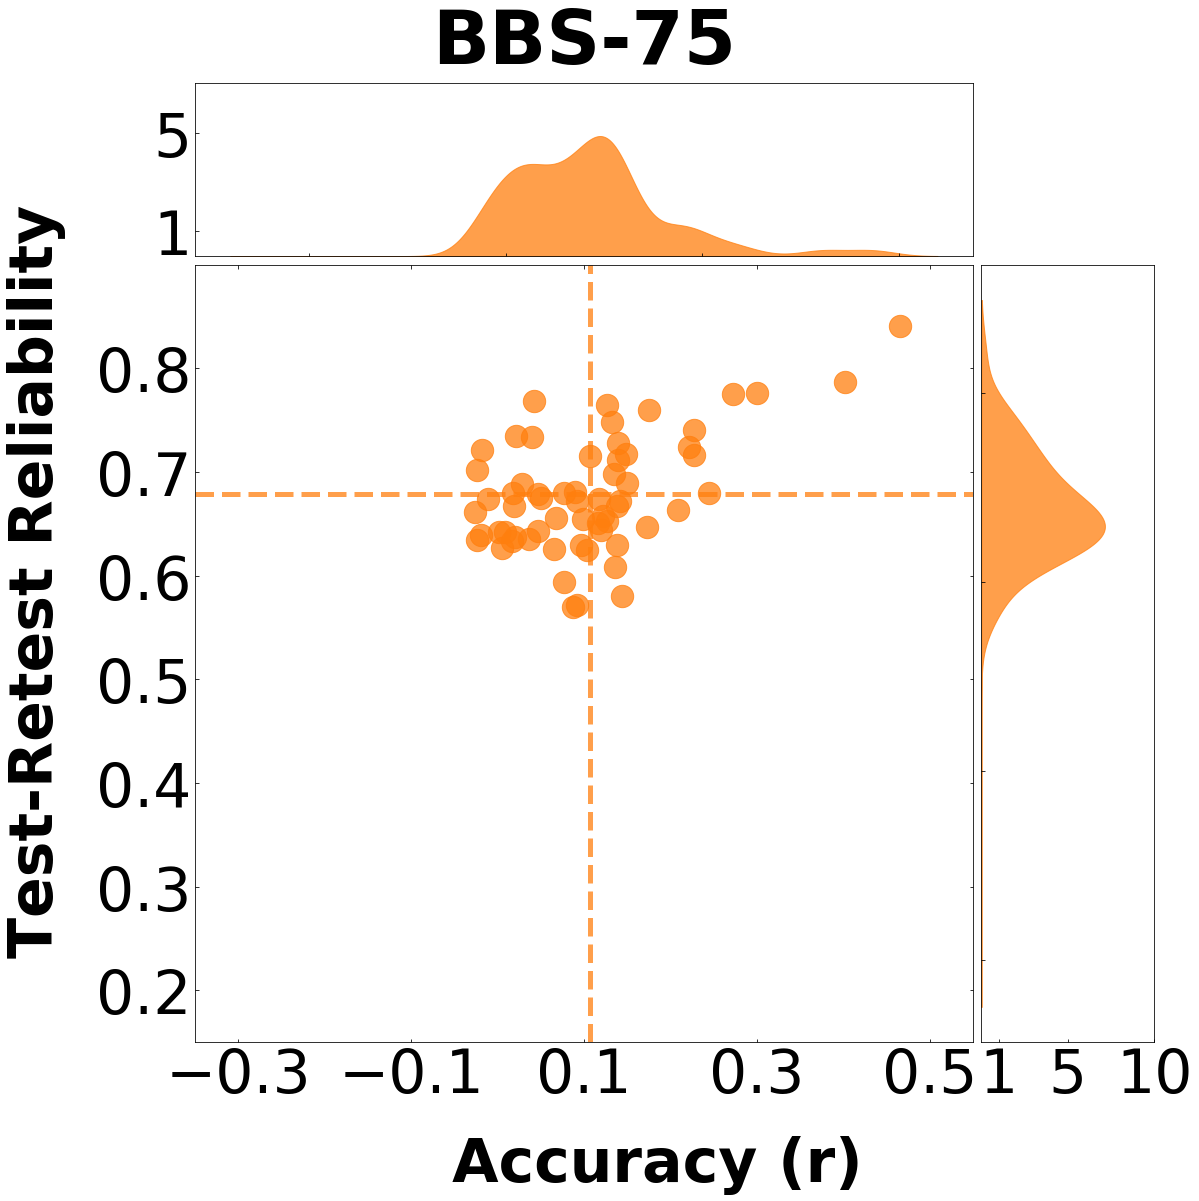

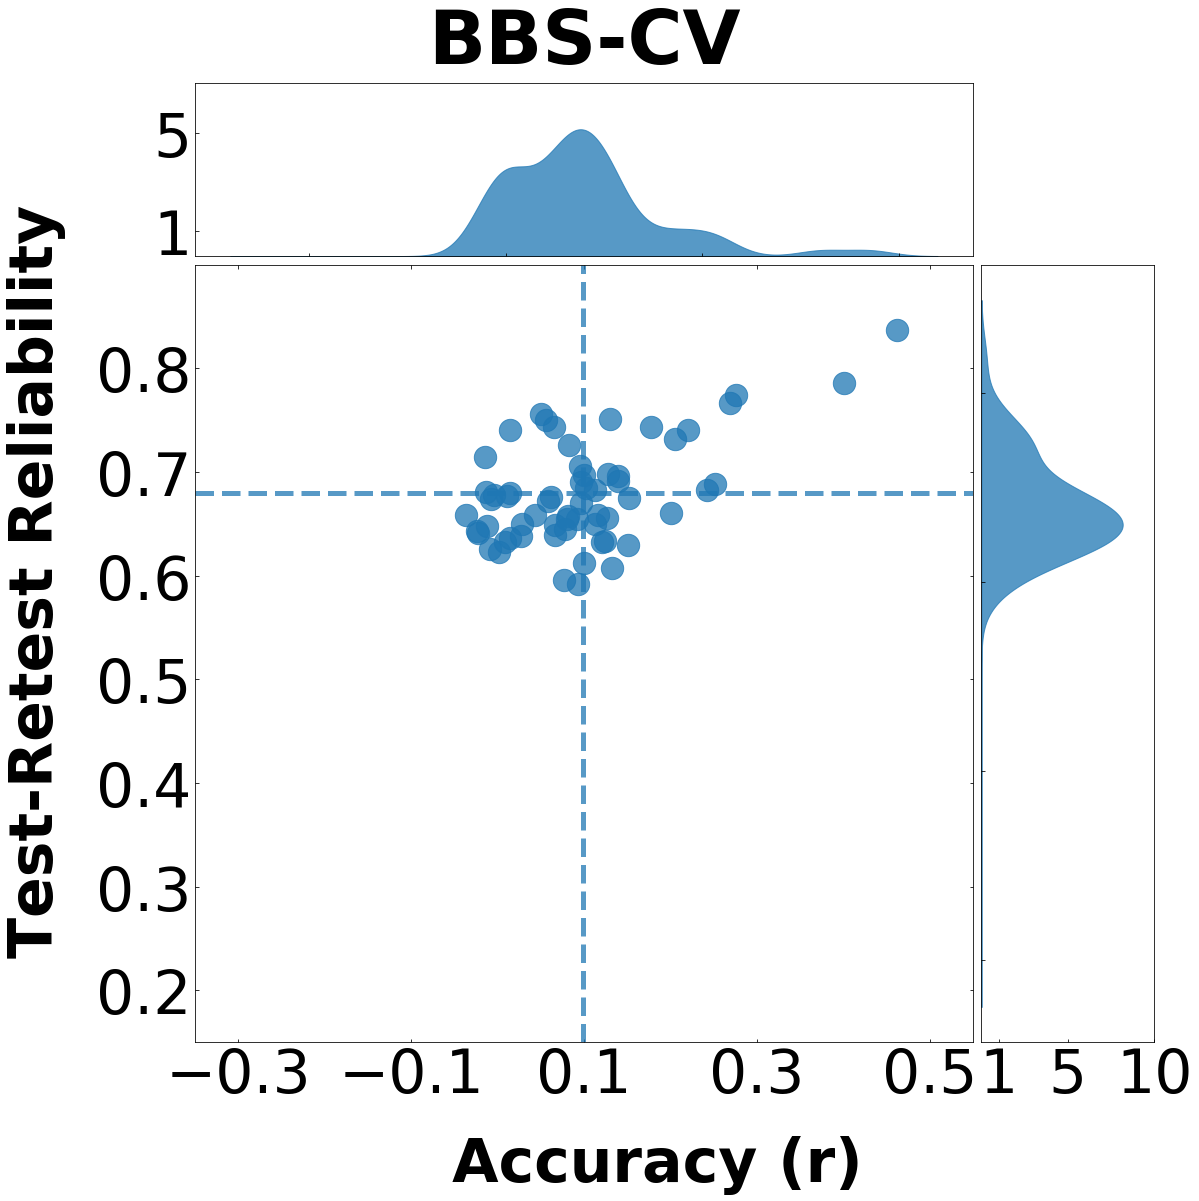

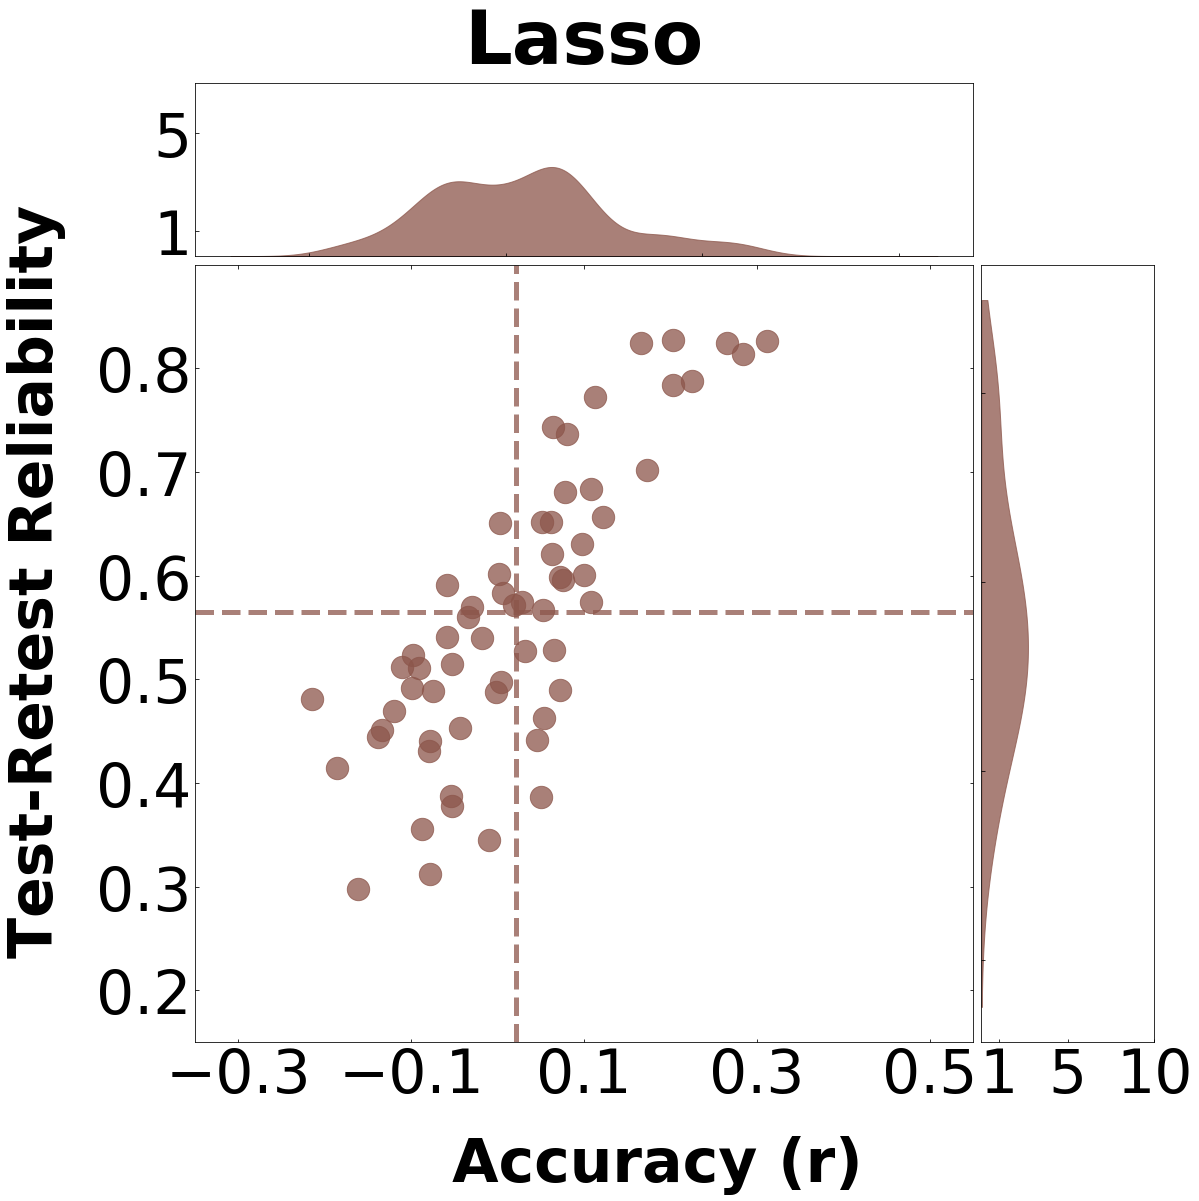

In [13]:
# definitions for the axes
left, width = 0.1, 0.9
bottom, height = 0.1, 0.9
spacing = 0.01


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]


# only display ICC vs Accuracy plots for 3 models
for model_idx, model_name in enumerate(results_names[:3]):
    results_ACC = model_icc_acc_dict[model_name]['mean_phen_acc']
    results_ICC = model_icc_acc_dict[model_name]['mean_phen_icc']
    label = model_name.replace('\n', '')
    c = model_colors[model_idx]

    # start with a rectangular Figure
    plt.figure(figsize=(12, 12))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)



    # horizontal mean lines
    ax_scatter.axhline(y=np.mean(results_ICC), color=c, linestyle='--', linewidth=5, alpha=0.75)
    # vertical mean lines
    ax_scatter.axvline(x=np.mean(results_ACC), color=c, linestyle='--', linewidth=5, alpha=0.75)


    # the scatter plot:
    SCATTER_SIZE = 500
    ax_scatter.scatter(results_ACC, results_ICC, label=label, s=SCATTER_SIZE, alpha=0.75, c=c)

    X_RANGE = (-0.35, 0.55)
    Y_RANGE = (0.15, 0.9)
    ax_scatter.set_xlim(X_RANGE)
    ax_scatter.set_ylim(Y_RANGE)
    ax_scatter.set_xticks(np.arange(X_RANGE[0]+0.05, X_RANGE[1], 0.2))
    ax_scatter.set_yticks(np.arange(Y_RANGE[0]+0.05, Y_RANGE[1], 0.1))
    ax_scatter.set_xlabel('       Accuracy (r)', fontsize=60, weight='bold', labelpad=30)
    ax_scatter.set_ylabel('       Test-Retest Reliability', fontsize=60, weight='bold', labelpad=30)
    ax_scatter.tick_params(labelsize=60)


    acc_xs = np.arange(X_RANGE[0], X_RANGE[1], 0.001)
    icc_xs = np.arange(Y_RANGE[0], Y_RANGE[1], 0.001)


    # density plot for accuracy
    density = stats.gaussian_kde(results_ACC)
    density.covariance_factor = lambda : .3
    density._compute_covariance()
    ax_histx.fill_between(acc_xs, density(acc_xs), 0, color=c, alpha=0.75)

    # density plot for ICC
    density = stats.gaussian_kde(results_ICC)
    density.covariance_factor = lambda : .5
    density._compute_covariance()
    ax_histy.fill_betweenx(icc_xs, density(icc_xs), 0, color=c, alpha=0.75)

    ax_histx.set_ylim((0, 7))
    ax_histy.set_xlim((0, 10))

    ax_histx.set_yticks([1, 5])
    ax_histy.set_xticks([1, 5, 10])

    ax_histx.tick_params(labelsize=60)
    ax_histy.tick_params(labelsize=60)

    ax_histx.set_title(label, fontsize=75, pad=20, fontweight='bold')

    plt.show()
    print()

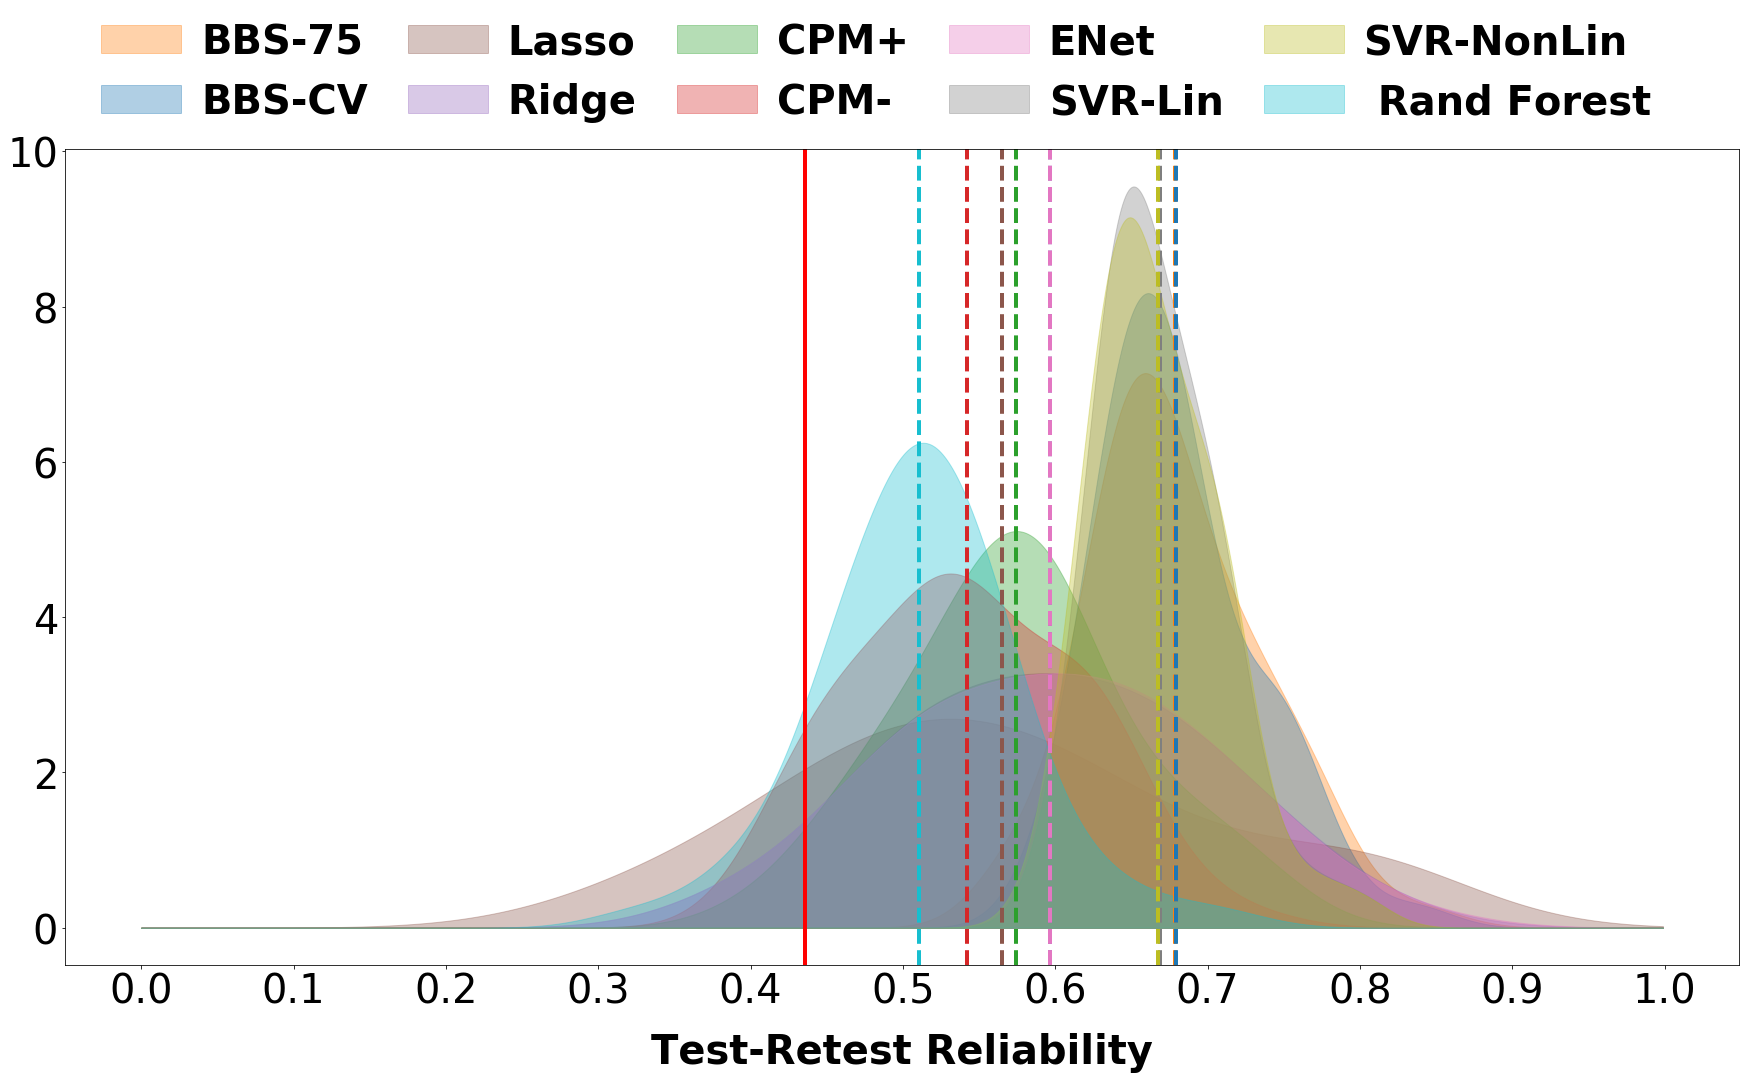

In [12]:
plt.figure(figsize=(30, 15))
Xs = np.arange(0, 1, 0.001)

for model_idx, model_name in enumerate(results_names):
    results_ICC = model_icc_acc_dict[model_name]['mean_phen_icc']
    label = model_name.replace('\n', '')
    c = model_colors[model_idx]
    density = stats.gaussian_kde(results_ICC)
    density.covariance_factor = lambda : .5
    density._compute_covariance()
    plt.fill_between(Xs, density(Xs), 0, color=c, alpha=0.35, label=label)
    lwidth = 4
    plt.axvline(x=np.mean(results_ICC), color=c, linestyle='--', linewidth=lwidth)

plt.axvline(x=np.mean(edge_iccs.values.flatten()), color='r', linestyle='-', linewidth=lwidth)


plt.xlabel('Test-Retest Reliability', fontsize=40, weight='bold', labelpad=20)
legend_properties = {'weight':'bold', 'size':40}
lgnd = plt.legend(ncol=5, frameon=False, handletextpad=0.5, columnspacing=1, prop=legend_properties, bbox_to_anchor=(0, 1.2), loc=2)
#change the marker size manually for both lines
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [1500]

plt.xticks(np.arange(0, 1.1, 0.1), fontsize=40)
plt.yticks(np.arange(0, 11, 2), fontsize=40)
plt.show()